# Modeling and Simulation in Python


Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
from sympy import *

init_printing()

In [2]:
x, y, vx, vy, ax, ay, R, t = symbols('x, y, vx, vy, ax, ay, R, t')
length0, k, m, g = symbols('length0, k, m, g')

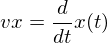

In [3]:
eq1 = Eq(vx, diff(x(t), t))
eq1

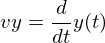

In [4]:
eq2 = Eq(vy, diff(y(t), t))
eq2

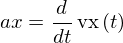

In [5]:
eq3 = Eq(ax, diff(vx(t), t))
eq3

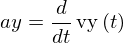

In [6]:
eq4 = Eq(ay, diff(vy(t), t))
eq4

In [7]:
import numpy as np

P = np.array([x, y])
P

array([x, y], dtype=object)

In [8]:
V = np.array([vx, vy])
V

array([vx, vy], dtype=object)

In [9]:
A = np.array([ax, ay])
A

array([ax, ay], dtype=object)

In [10]:
def mag(P):
    return sqrt(P[0]**2 + P[1]**2)

In [11]:
mag(P)

In [12]:
def hat(P):
    return P / mag(P)

In [13]:
hat(P)

array([x/sqrt(x**2 + y**2), y/sqrt(x**2 + y**2)], dtype=object)

In [14]:
length = mag(P)
length

In [15]:
f_spring = -k * (length - length0) * hat(P)
f_spring

array([-k*x*(-length0 + sqrt(x**2 + y**2))/sqrt(x**2 + y**2),
       -k*y*(-length0 + sqrt(x**2 + y**2))/sqrt(x**2 + y**2)], dtype=object)

In [16]:
xhat = np.array([1, 0])
yhat = np.array([0, 1])

In [17]:
f_grav = -m * g * yhat
f_grav

array([0, -g*m], dtype=object)

In [19]:
lhs = m * A

In [20]:
rhs = f_spring + f_grav

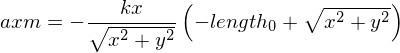

In [21]:
eq6 = Eq(lhs[0], rhs[0])
eq6

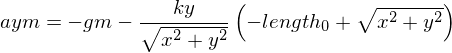

In [22]:
eq7 = Eq(lhs[1], rhs[1])
eq7

In [23]:
soln = solve([eq6, eq7], [ax, ay])

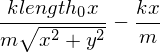

In [24]:
soln[ax]

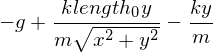

In [25]:
soln[ay]

### Rigid pendulum

In [61]:
eq5 = Eq(x*ax + y*ay + vx**2 + vy**2, 0)
eq5

In [62]:
f_tension = -R * hat(P)

In [63]:
lhs = m * A

In [64]:
rhs = f_grav + f_tension

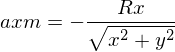

In [65]:
eq6 = Eq(lhs[0], rhs[0])
eq6

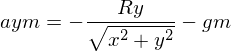

In [66]:
eq7 = Eq(lhs[1], rhs[1])
eq7

In [67]:
soln = solve([eq5b, eq6, eq7], [ax, ay, R])

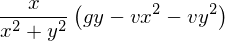

In [68]:
soln[ax]

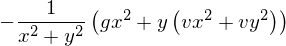

In [69]:
soln[ay]